<a href="https://colab.research.google.com/github/Deepakraj14-tamil/Deepu/blob/main/Plant-Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Set the path to your training, testing, and validation data directories
train_dir = '/content/drive/MyDrive/archive/Train/Train'
test_dir = '/content/drive/MyDrive/archive/Test/Test'
valid_dir = '/content/drive/MyDrive/archive/Validation/Validation'

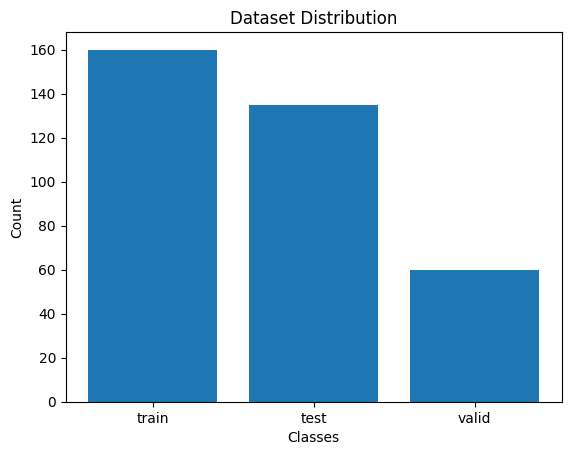

In [39]:
import matplotlib.pyplot as plt

# Sample data
labels = ['train', 'test', 'valid']
values = [160, 135, 60]

# Create the bar plot
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Dataset Distribution')

# Display the plot
plt.show()


In [8]:
# Define image parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # 3 channels for RGB images

# Define the number of classes (plant diseases) in your dataset
num_classes = 3

# Set the batch size and number of epochs
batch_size = 32
epochs = 20

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [9]:
# Rescaling for the testing and validation sets
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)


# Load and augment the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the testing data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the validation data
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)



Found 1299 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [10]:
# Build the CNN model with increased complexity
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [11]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=epochs,
    validation_data=valid_data,
    validation_steps = valid_data.samples // batch_size
)

Epoch 1/20
40/40 [==============================] - 323s 8s/step - loss: 0.9489 - accuracy: 0.5028 - val_loss: 0.8393 - val_accuracy: 0.5938
Epoch 2/20
40/40 [==============================] - 304s 8s/step - loss: 0.6295 - accuracy: 0.7064 - val_loss: 0.5909 - val_accuracy: 0.7812
Epoch 3/20
40/40 [==============================] - 320s 8s/step - loss: 0.4886 - accuracy: 0.7893 - val_loss: 0.3084 - val_accuracy: 0.8750
Epoch 4/20
40/40 [==============================] - 316s 8s/step - loss: 0.3484 - accuracy: 0.8619 - val_loss: 0.4331 - val_accuracy: 0.8125
Epoch 5/20
40/40 [==============================] - 317s 8s/step - loss: 0.2580 - accuracy: 0.9021 - val_loss: 0.2723 - val_accuracy: 0.8750
Epoch 6/20
40/40 [==============================] - 313s 8s/step - loss: 0.2199 - accuracy: 0.9140 - val_loss: 0.2584 - val_accuracy: 0.9375
Epoch 7/20
40/40 [==============================] - 310s 8s/step - loss: 0.1928 - accuracy: 0.9313 - val_loss: 0.4983 - val_accuracy: 0.8438
Epoch 8/20
40

In [12]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 - 28s - loss: 0.2657 - accuracy: 0.9333 - 28s/epoch - 6s/step
Test Loss: 0.26568493247032166
Test Accuracy: 0.9333333373069763


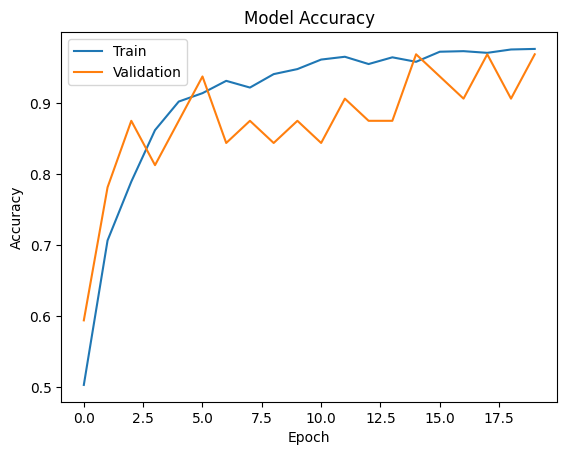

In [13]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


5/5 [==============================] - 28s 5s/step
Accuracy: 0.9333333333333333


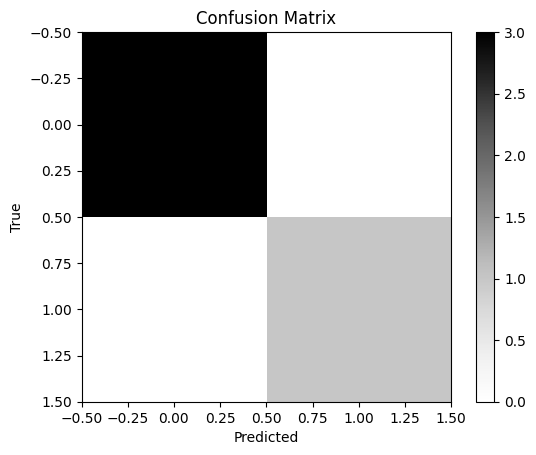

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random confusion matrix for illustration
cm = np.random.randint(0, 4, size=(2, 2))

# Define the custom color map
cmap = plt.cm.Greys
cmap.set_under('white')

# Plot the confusion matrix using the custom color map
plt.imshow(cm, cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[49  1  0]
 [ 5 45  0]
 [ 3  1 46]]


In [17]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_true, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        50
           1       0.96      0.90      0.93        50
           2       1.00      0.92      0.96        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



5/5 [==============================] - 28s 6s/step


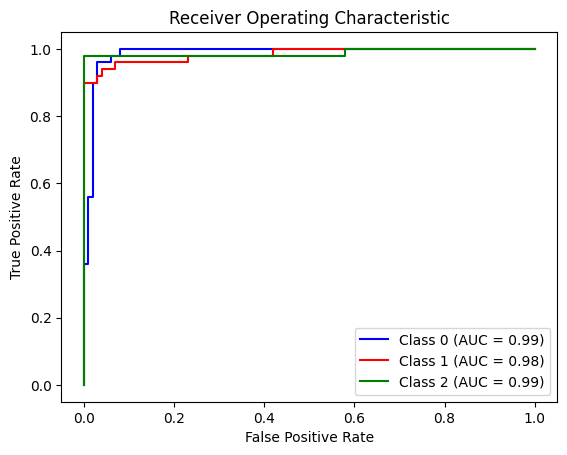

In [20]:
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

# Calculate the predicted probabilities for all classes
y_scores = model.predict(test_data)

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
    auc[i] = roc_auc_score(y_true_bin[:, i], y_scores[:, i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors based on the number of classes
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='Class {0} (AUC = {1:.2f})'.format(i, auc[i]))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
